In this example, we're analysing the popular MNIST dataset (digits) and training a deep larning algorithm (neural network, NN) to identify handwritten numbers.

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

As usual, let's have a quick look at our dataset.

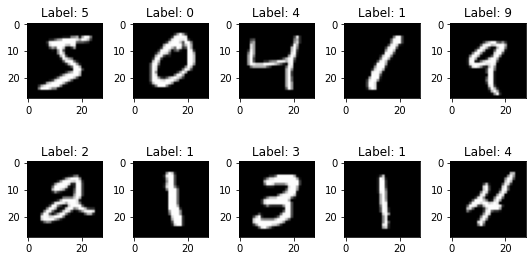

(28, 28)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

num_row = 2
num_col = 5
# Plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num_row * num_col):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title('Label: {}'.format(y_train[i]))
plt.tight_layout()
plt.show()

print(x_train[1].shape)

We now define our neural network: 
- A sequence of layers which take as input 28x28 images which is flattened to a 1-dimensional array of size 784.
- A dense intermediate layer with a ReLU activation
- A dropout rate of 0.2
- Finally, a dense output layer of size 10 (for each digit)

In [3]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


We test the prediction of our (untrained) model on the first element of our training sample.

In [4]:
predictions = model1(x_train[:1]).numpy()
print( predictions )

[[ 0.25467616 -0.06097458 -1.0380944   0.52009517 -0.09392027  0.24861108
  -0.08299547  0.4113286   0.29113013  0.4554934 ]]


The `tf.nn.softmax` function converts these logits to "probabilities" for each class.

In [5]:
print( tf.nn.softmax(predictions).numpy() )

[[0.10928988 0.07970665 0.03000107 0.14251152 0.07712345 0.10862904
  0.07797062 0.12782425 0.11334744 0.13359609]]


We define our *loss* function and use it on our (untrained) model. This untrained model gives probabilities close to random (1/10 for each class), so the initial loss should be close to -tf.log(1/10) ~= 2.3.

In [6]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print (loss_fn(y_train[:1], predictions).numpy())


2.2198164


Let us now compile, using the ADAM optimiser and an accuracy metric, and train (fit) our model for 5 epochs.

In [7]:
model1.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model1.fit(x_train, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 2s 960us/step - loss: 0.4770 - accuracy: 0.8600
Epoch 2/5
1875/1875 [==============================] - 2s 963us/step - loss: 0.1517 - accuracy: 0.9543
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1105 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 2s 1000us/step - loss: 0.0893 - accuracy: 0.9717
Epoch 5/5
1875/1875 [==============================] - 2s 921us/step - loss: 0.0734 - accuracy: 0.9764


We can now evaluate the accuracy of the model for our testing dataset.

The image classifier is now trained to ~98% accuracy on this dataset.

Try increasing the number of epochs and see if it has any effect.

In [8]:
model1.evaluate(x_test,  y_test, verbose=2)

313/313 - 0s - loss: 0.0734 - accuracy: 0.9778


[0.07336029410362244, 0.9778000116348267]

One can obtain a *probability model* by wrapping the model around a softmax function.

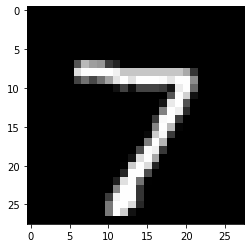

Predicted number is 7


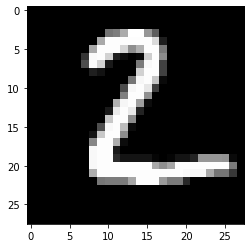

Predicted number is 2


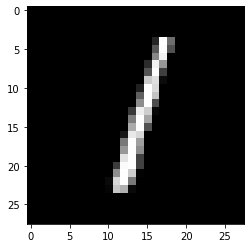

Predicted number is 1


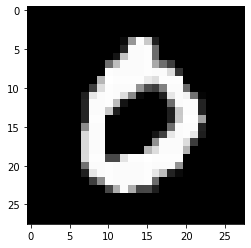

Predicted number is 0


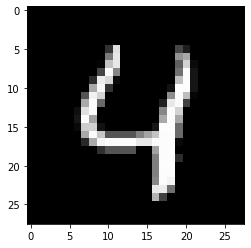

Predicted number is 4


In [9]:
probability_model = tf.keras.Sequential([
  model1,
  tf.keras.layers.Softmax()
])

for i in range(0,5):
  import numpy as np
  import matplotlib.pyplot as plt
  %matplotlib inline
  plt.imshow(x_test[i], cmap='gray')
  plt.show()
  mod_output = probability_model(x_test[i:i+1])
  print("Predicted number is", np.argmax(mod_output))


This last snippet allows comparing the prediction with the actual value

In [10]:
for i, p in enumerate(model1.predict(x_test)):
  print (y_test[i], np.argmax(p), y_test[i] == np.argmax(p))
  if i > 20: break

7 7 True
2 2 True
1 1 True
0 0 True
4 4 True
1 1 True
4 4 True
9 9 True
5 5 True
9 9 True
0 0 True
6 6 True
9 9 True
0 0 True
1 1 True
5 5 True
9 9 True
7 7 True
3 3 True
4 4 True
9 9 True
6 6 True



We can also train, evaluate and fit a new model `model2` with different settings for comparison.

Have fun playing with the parameters.


In [11]:
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(150, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

model2.summary()

model2.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=5)

model2.evaluate(x_test,  y_test, verbose=2)


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 150)               117750    
_________________________________________________________________
dropout_1 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1510      
Total params: 119,260
Trainable params: 119,260
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4591 - accuracy: 0.8668
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1406 - accuracy: 0.9583
Epoch 3/5
1875/1875 [=======================

[0.07349991798400879, 0.9785000085830688]